# KNN Regression — Advanced Theory & Interview Q&A

## Advanced Theory

- **Instance-Based Learning:** KNN stores all training data and predicts based on similarity.
- **Distance Metrics:** Euclidean, Manhattan, Minkowski, cosine; choice affects performance.
- **Weighted Averaging:** Neighbors can be weighted by distance for improved accuracy.
- **Feature Scaling:** Essential for fair distance calculations.
- **Curse of Dimensionality:** High-dimensional data can degrade KNN performance.
- **Model Selection:** Use cross-validation to select k and distance metric.
- **Extensions:** Radius-based neighbors, KD-tree/Ball-tree for efficiency.
- **Diagnostics:** RMSE, R², residual analysis.

## Advanced Interview Q&A

**Q1: How do you choose k in KNN Regression?**  
A: Use cross-validation; small k is noisy, large k is biased.

**Q2: What is the impact of distance metric?**  
A: Determines similarity; choice affects accuracy and computation.

**Q3: How do you handle high-dimensional data in KNN Regression?**  
A: Use feature selection, dimensionality reduction (PCA), or other algorithms.

**Q4: What is the curse of dimensionality?**  
A: In high dimensions, all points become equidistant, degrading performance.

**Q5: How do you assess model fit?**  
A: Use RMSE, R², residual analysis.

**Q6: How do you handle categorical variables in KNN Regression?**  
A: Encode as numbers or use specialized distance metrics.

**Q7: What are KD-tree and Ball-tree?**  
A: Data structures for efficient neighbor search in KNN.

**Q8: What is weighted averaging in KNN Regression?**  
A: Neighbors closer to the query point have more influence on prediction.

**Q9: What are the limitations of KNN Regression?**  
A: Slow prediction, sensitive to irrelevant features and scaling.

**Q10: How do you handle missing values in KNN Regression?**  
A: Impute missing values or use algorithms that handle them natively.

# K-Nearest Neighbors (KNN) Regression — Theory & Interview Q&A

KNN Regression predicts the value of a data point by averaging the values of its k nearest neighbors.

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Predicts value by averaging k nearest neighbors.                        |
| **Equation**          | Distance metric (e.g., Euclidean, Manhattan)                            |
| **Use Cases**         | Price prediction, time series, environmental modeling                   |
| **Assumptions**       | Similar points are close in feature space                               |
| **Pros**              | Simple, no training phase, flexible distance metrics                    |
| **Cons**              | Slow for large datasets, sensitive to irrelevant features               |
| **Key Parameters**    | k (number of neighbors), distance metric, weights                      |
| **Evaluation Metrics**| MSE, RMSE, R² Score                                                     |

## Interview Q&A

**Q1: What is KNN Regression?**  
A: It predicts the value of a data point by averaging the values of its k nearest neighbors.

**Q2: How do you choose k?**  
A: Use cross-validation; too small k is noisy, too large k is biased.

**Q3: What distance metrics are used?**  
A: Common ones are Euclidean, Manhattan, Minkowski.

**Q4: What are the limitations of KNN Regression?**  
A: Slow prediction, sensitive to feature scaling and irrelevant features.

**Q5: How do you improve KNN Regression performance?**  
A: Feature selection, scaling, using weighted averaging.

**Q6: Is KNN Regression parametric or non-parametric?**  
A: Non-parametric; it makes no assumptions about data distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('knn', KNeighborsRegressor())
])

## pipeline used for regression tasks like scaling and model fitting, it helps in streamlining the process
## how pipeline works:
## 1. Data is first scaled using StandardScaler
## 2. Then, the KNeighborsRegressor model is applied to the scaled data
## other steps in pipeline can include feature selection, dimensionality reduction, etc.
## examples include PCA (Principal Component Analysis), SelectKBest, etc.

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

## Param grid used to define the hyperparameters to be tuned during the grid search

In [9]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
## cv means cross-validation , used to evaluate the model's performance on different subsets of the data
## n_jobs=-1 means using all processors - used to speed up the computation
## verbose=1 means to print the progress of the grid search

## other than GridSearchCV, you can also use RandomizedSearchCV for hyperparameter tuning
## which is best from GridSearchCV when the search space is large
## RandomizedSearchCV samples a given number of candidates from a parameter space with a specified distribution

In [7]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
R² Score: 0.72210916268423
RMSE: 0.6034489607162036


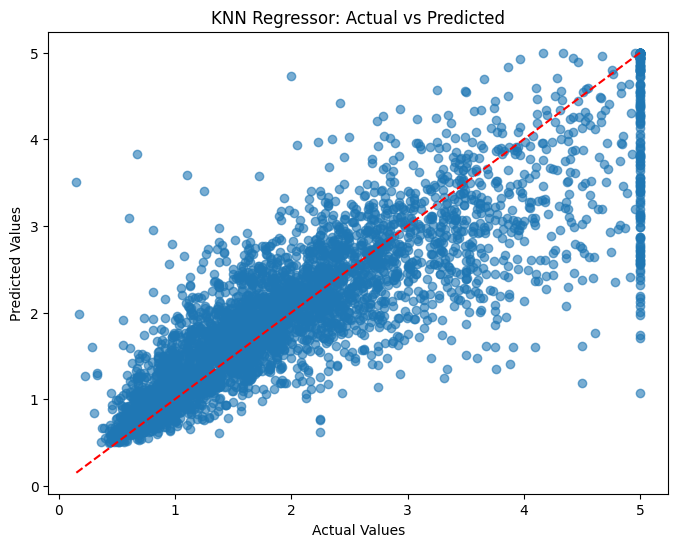

In [8]:
# 7️⃣ Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regressor: Actual vs Predicted")
plt.show()